# `Jai Chaudhry 2K18-SE-069`

## Experiment - 9

- Apply k-Means clustering algorithm on suitable datasets and comment on the quality of
  clustering.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [2]:
X,y = make_blobs(n_samples = 1000, n_features = 2, centers = 8, random_state = 15)

In [3]:
print(X.shape)

(1000, 2)


In [ ]:
X = [
    [1,2],
    [3,4],
    [10,100],
    [20,100],
    [30,100],
    [40,100]
]


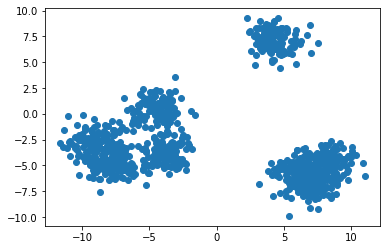

In [244]:
plt.scatter(X[:,0],X[:,1])
plt.show()


In [245]:
k=8
color = ["green","yellow","blue","orange","red","magenta","cyan","hotpink"]
clusters = {}

for i in range(k):
    center = [np.random.uniform(-10,10),np.random.uniform(-10,10)]
    
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster


In [246]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))


In [247]:
def assignPointsToClusters(clusters):
    
    maxpoints = X.shape[0]//k
    
    # Analyze all points
    for i in range(0,X.shape[0]):
        
        # An array to store the distance of current point from all cluster centers
        dist = []
        current_point = X[i]

        for ki in range(0,k):
            dis = distance(current_point,clusters[ki]['center'])
            dist.append(dis)
        
        
        min_cluster = np.argmin(dist)
        placed = 0
                
        while len(dist)>0:
            
            # Get the cluster from whom this point has minimum distance
            current_cluster = np.argmin(dist)
            
            if len(clusters[current_cluster]['points']) <= maxpoints + 1:
                # append this point to this closest cluster
                clusters[current_cluster]['points'].append(current_point)
                placed = 1
                break
            else:
                dist.remove(min(dist))
                
        if placed==0:
            clusters[min_cluster]['points'].append(current_point)
    
    # END

def updateClusters(clusters):
    
    for i in range(0,k):
        points = np.array(clusters[i]['points'])
        
        # If there are points in this cluster
        # Then find new center and clear the points in this cluster for new forward pass
        if points.shape[0]>0:
            new_center = points.mean(axis = 0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []                             

def plotClusters(clusters):
    
    for i in range(0,k):
        
        # Get all points 
        points = np.array(clusters[i]['points'])
        
#         print(points.shape)
        if points.shape[0]>0:
            # Plot the points
            plt.scatter(points[:,0],points[:,1],color = clusters[i]['color'])
    
        center = clusters[i]['center']            
        plt.scatter(center[0],center[1],color = 'black',marker = "*")
    plt.show()


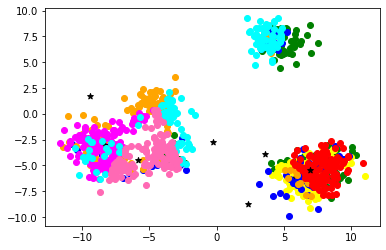

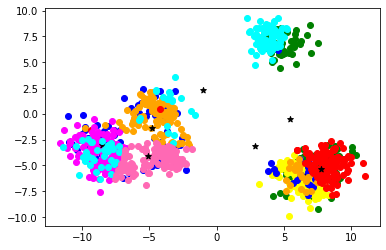

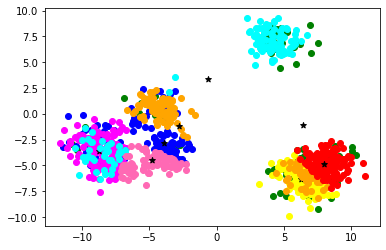

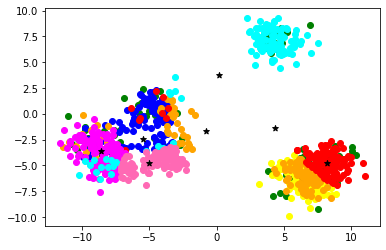

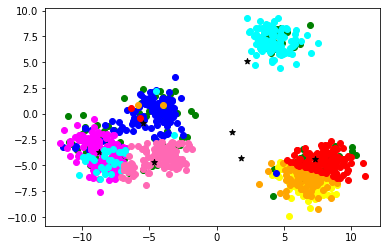

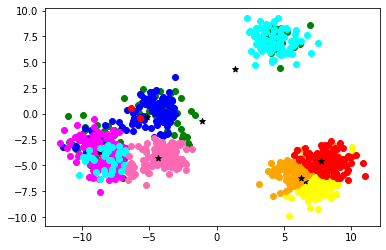

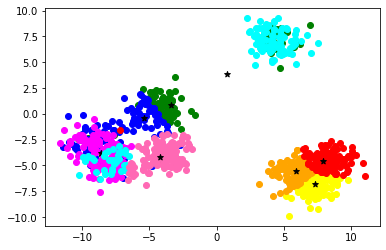

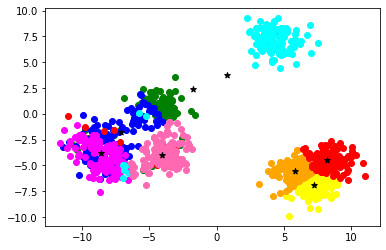

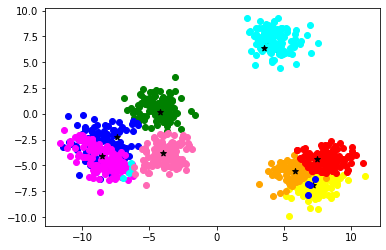

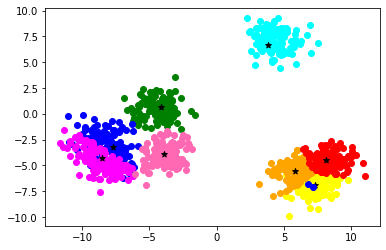

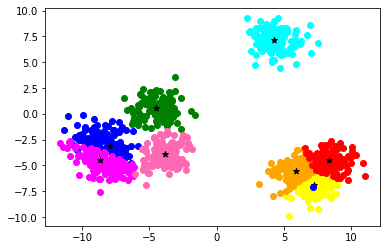

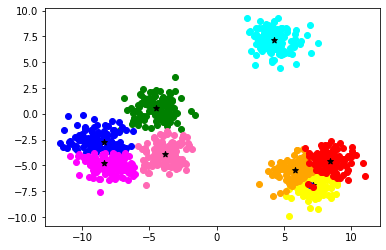

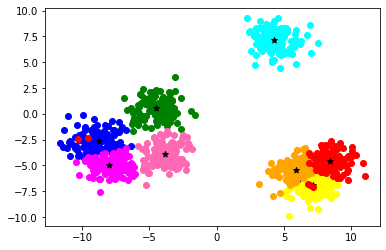

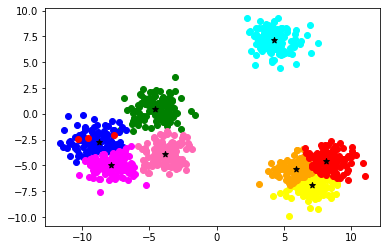

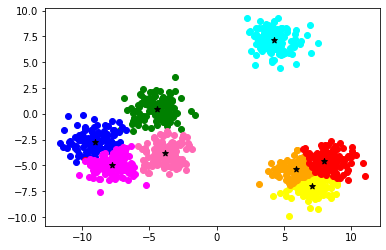

In [248]:
for i in range(0,15):
    updateClusters(clusters)
    assignPointsToClusters(clusters)
    plotClusters(clusters)


# `Jai Chaudhry 2K18-SE-069`